# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

$$f(x) = a + b * x^n$$

to some cubic data with noise.

In [1]:
% matplotlib inline
from __future__ import print_function
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model
import statsmodels.api as sm

## Some helper functions
The following functions will generate data and polynomial values.

In [2]:
def polynomials(X, degree=1):
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [3]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [4]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4$.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     34.72
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           1.13e-05
Time:                        22:14:29   Log-Likelihood:                -50.560
No. Observations:                  20   AIC:                             103.1
Df Residuals:                      19   BIC:                             104.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.3000      0.560      5.893      0.0

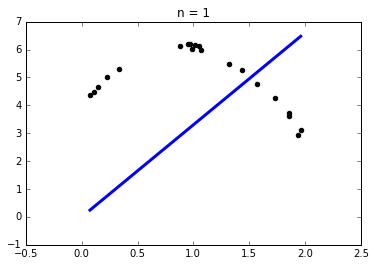

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     14.70
Date:                Thu, 04 Aug 2016   Prob (F-statistic):            0.00112
Time:                        22:14:29   Log-Likelihood:                -55.222
No. Observations:                  20   AIC:                             112.4
Df Residuals:                      19   BIC:                             113.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.6642      0.434      3.835      0.0

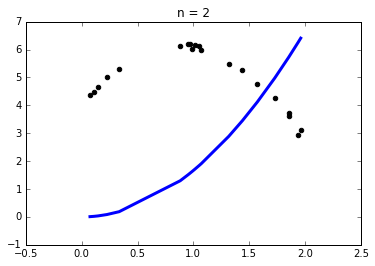

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     8.554
Date:                Thu, 04 Aug 2016   Prob (F-statistic):            0.00869
Time:                        22:14:29   Log-Likelihood:                -57.237
No. Observations:                  20   AIC:                             116.5
Df Residuals:                      19   BIC:                             117.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7961      0.272      2.925      0.0

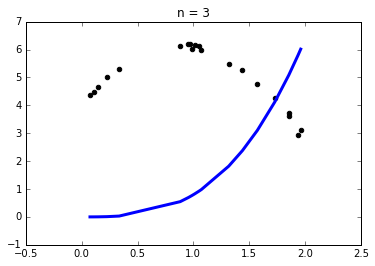

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     5.848
Date:                Thu, 04 Aug 2016   Prob (F-statistic):             0.0258
Time:                        22:14:29   Log-Likelihood:                -58.271
No. Observations:                  20   AIC:                             118.5
Df Residuals:                      19   BIC:                             119.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3790      0.157      2.418      0.0

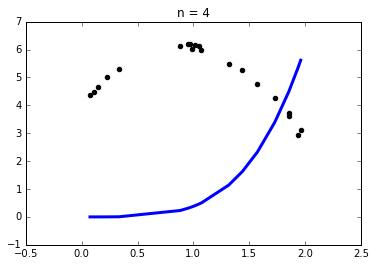

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     4.456
Date:                Thu, 04 Aug 2016   Prob (F-statistic):             0.0483
Time:                        22:14:29   Log-Likelihood:                -58.847
No. Observations:                  20   AIC:                             119.7
Df Residuals:                      19   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1829      0.087      2.111      0.0

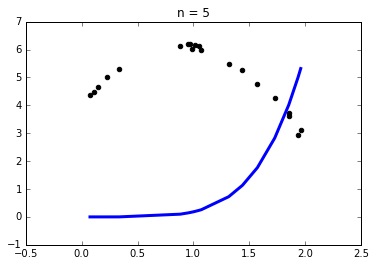

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     3.654
Date:                Thu, 04 Aug 2016   Prob (F-statistic):             0.0712
Time:                        22:14:29   Log-Likelihood:                -59.196
No. Observations:                  20   AIC:                             120.4
Df Residuals:                      19   BIC:                             121.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0896      0.047      1.911      0.0

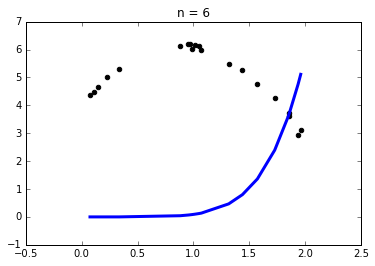

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     3.145
Date:                Thu, 04 Aug 2016   Prob (F-statistic):             0.0922
Time:                        22:14:29   Log-Likelihood:                -59.423
No. Observations:                  20   AIC:                             120.8
Df Residuals:                      19   BIC:                             121.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0444      0.025      1.773      0.0

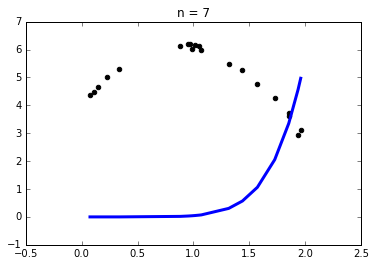

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     2.795
Date:                Thu, 04 Aug 2016   Prob (F-statistic):              0.111
Time:                        22:14:29   Log-Likelihood:                -59.582
No. Observations:                  20   AIC:                             121.2
Df Residuals:                      19   BIC:                             122.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0222      0.013      1.672      0.1

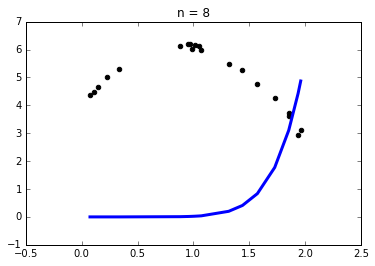

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.540
Date:                Thu, 04 Aug 2016   Prob (F-statistic):              0.128
Time:                        22:14:30   Log-Likelihood:                -59.700
No. Observations:                  20   AIC:                             121.4
Df Residuals:                      19   BIC:                             122.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0111      0.007      1.594      0.1

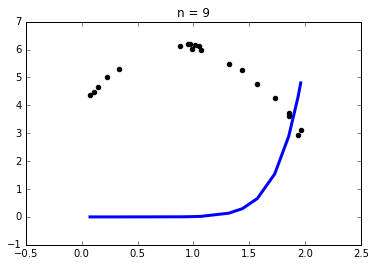

In [5]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = monomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to note that the true measures of bias and variance are averaged over many fits to many samples from the same data source, and we're only looking at one instance here. Notice that the bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

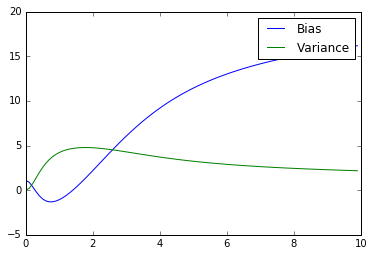

In [6]:
bs = []
vars = []
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what changes when compared to the code above?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     34.72
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           1.13e-05
Time:                        22:14:30   Log-Likelihood:                -50.560
No. Observations:                  20   AIC:                             103.1
Df Residuals:                      19   BIC:                             104.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.3000      0.560      5.893      0.0

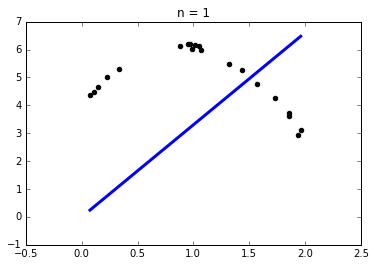

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     93.77
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           3.03e-10
Time:                        22:14:30   Log-Likelihood:                -36.601
No. Observations:                  20   AIC:                             77.20
Df Residuals:                      18   BIC:                             79.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            12.0744      1.221      9.893      0.0

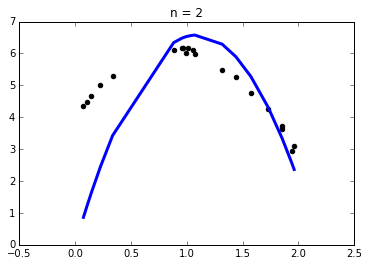

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     130.5
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           6.19e-12
Time:                        22:14:30   Log-Likelihood:                -29.164
No. Observations:                  20   AIC:                             64.33
Df Residuals:                      17   BIC:                             67.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            24.1278      2.914      8.279      0.0

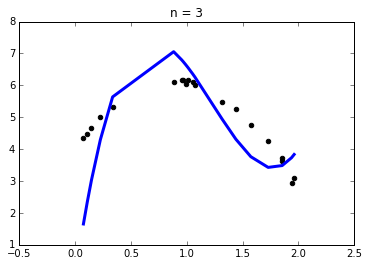

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     227.8
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           6.98e-14
Time:                        22:14:30   Log-Likelihood:                -20.361
No. Observations:                  20   AIC:                             48.72
Df Residuals:                      16   BIC:                             52.70
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            35.5378      3.083     11.527      0.0

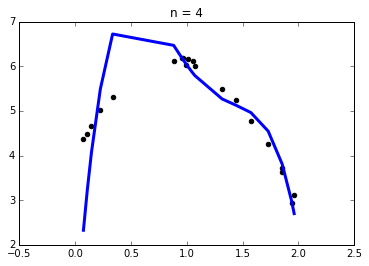

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     256.8
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           5.63e-14
Time:                        22:14:30   Log-Likelihood:                -16.341
No. Observations:                  20   AIC:                             42.68
Df Residuals:                      15   BIC:                             47.66
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            43.8891      4.022     10.911      0.0

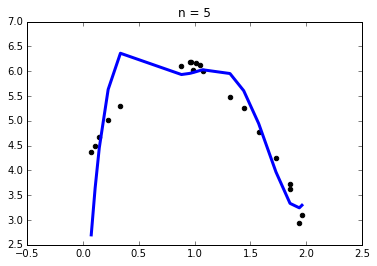

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     622.8
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           3.61e-16
Time:                        22:14:30   Log-Likelihood:                -5.0475
No. Observations:                  20   AIC:                             22.09
Df Residuals:                      14   BIC:                             28.07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            62.2685      4.139     15.045      0.0

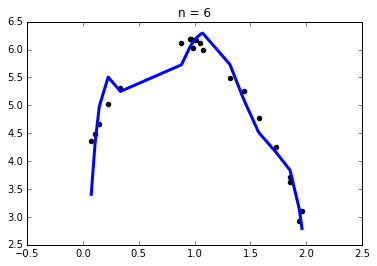

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     995.4
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           1.05e-16
Time:                        22:14:31   Log-Likelihood:                 1.9052
No. Observations:                  20   AIC:                             10.19
Df Residuals:                      13   BIC:                             17.16
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            71.2593      3.924     18.161      0.0

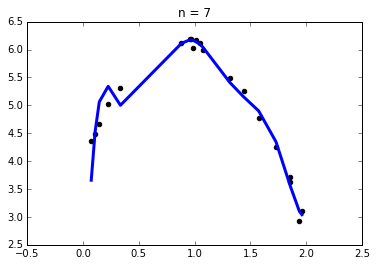

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1107.
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           5.14e-16
Time:                        22:14:31   Log-Likelihood:                 5.0984
No. Observations:                  20   AIC:                             5.803
Df Residuals:                      12   BIC:                             13.77
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            79.7569      5.302     15.042      0.0

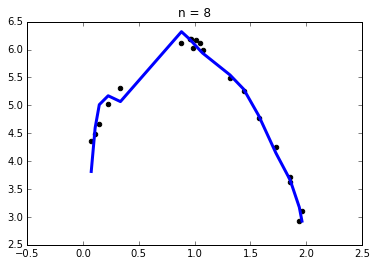

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2383.
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           8.68e-17
Time:                        22:14:31   Log-Likelihood:                 14.804
No. Observations:                  20   AIC:                            -11.61
Df Residuals:                      11   BIC:                            -2.646
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            99.1428      5.697     17.401      0.0

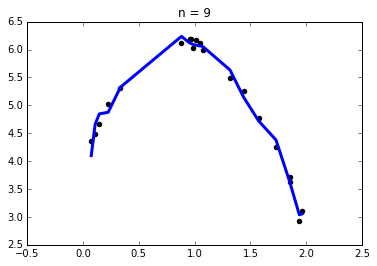

In [7]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

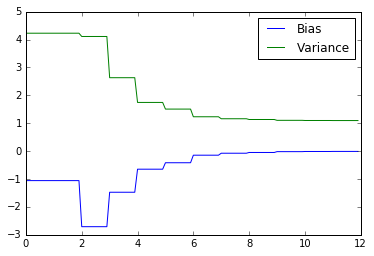

In [8]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

# Guided Practice

We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investigate the bias and variance as the data source changes in complexity


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     435.2
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           1.48e-14
Time:                        22:14:56   Log-Likelihood:                -11.207
No. Observations:                  20   AIC:                             24.41
Df Residuals:                      19   BIC:                             25.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.8433      0.088     20.860      0.0

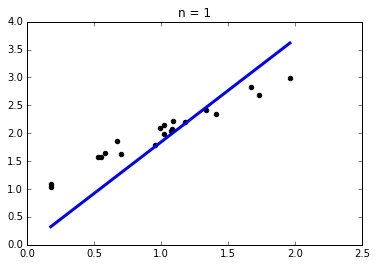

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     192.2
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           2.19e-11
Time:                        22:14:56   Log-Likelihood:                -27.392
No. Observations:                  20   AIC:                             56.78
Df Residuals:                      19   BIC:                             57.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.0262      0.218     13.862      0.0

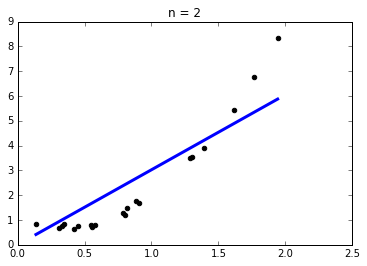

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     82.97
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           2.32e-08
Time:                        22:14:56   Log-Likelihood:                -47.526
No. Observations:                  20   AIC:                             97.05
Df Residuals:                      19   BIC:                             98.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.7256      0.519      9.109      0.0

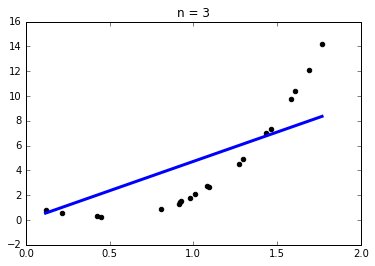

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     50.85
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           8.85e-07
Time:                        22:14:56   Log-Likelihood:                -65.795
No. Observations:                  20   AIC:                             133.6
Df Residuals:                      19   BIC:                             134.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             9.6934      1.359      7.131      0.0

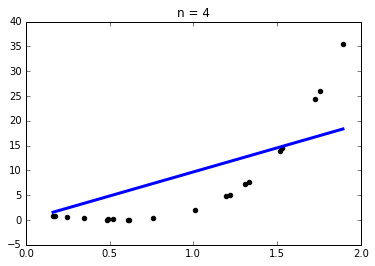

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     30.45
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           2.53e-05
Time:                        22:14:56   Log-Likelihood:                -65.201
No. Observations:                  20   AIC:                             132.4
Df Residuals:                      19   BIC:                             133.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             8.0377      1.457      5.518      0.0

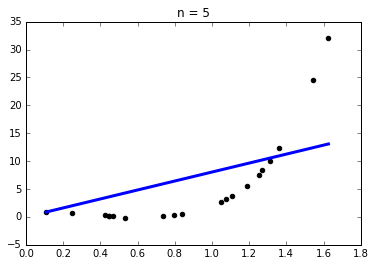

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     37.43
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           6.99e-06
Time:                        22:14:56   Log-Likelihood:                -91.014
No. Observations:                  20   AIC:                             184.0
Df Residuals:                      19   BIC:                             185.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            27.6450      4.518      6.118      0.0

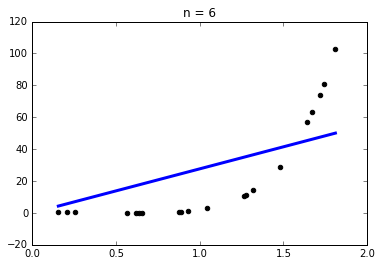

In [10]:
for i in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** i + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01

    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))

    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

# Individual Exercises

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

> Answer: These functions are not polynomial in nature and can be arbitrarily well approximately with a sufficiently large polynomial.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     12.26
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           0.000695
Time:                        22:15:12   Log-Likelihood:                -96.050
No. Observations:                 100   AIC:                             194.1
Df Residuals:                      99   BIC:                             196.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0603      0.017     -3.502      0.0

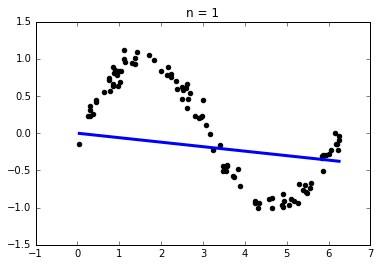

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     25.05
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           1.63e-09
Time:                        22:15:12   Log-Likelihood:                -81.239
No. Observations:                 100   AIC:                             166.5
Df Residuals:                      98   BIC:                             171.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.2747      0.060      4.613      0.0

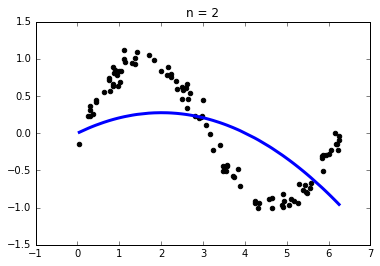

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     824.7
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           7.23e-69
Time:                        22:15:12   Log-Likelihood:                 61.979
No. Observations:                 100   AIC:                            -118.0
Df Residuals:                      97   BIC:                            -110.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.5909      0.036     44.395      0.0

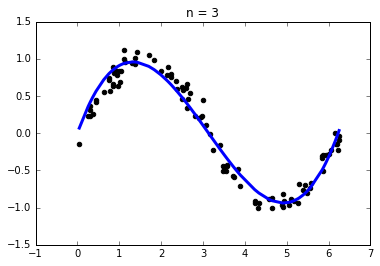

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     636.1
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           3.82e-68
Time:                        22:15:12   Log-Likelihood:                 63.831
No. Observations:                 100   AIC:                            -119.7
Df Residuals:                      96   BIC:                            -109.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.4878      0.065     22.986      0.0

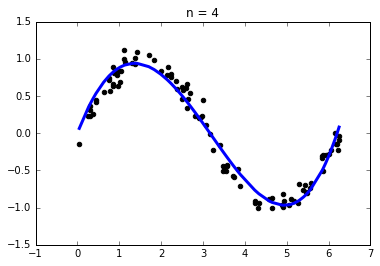

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1046.
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           2.20e-81
Time:                        22:15:12   Log-Likelihood:                 99.419
No. Observations:                 100   AIC:                            -188.8
Df Residuals:                      95   BIC:                            -175.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8342      0.080     10.418      0.0

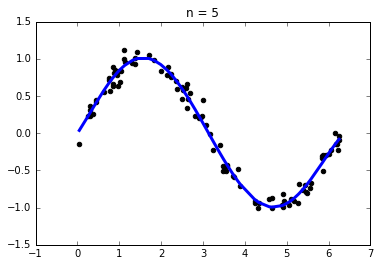

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     862.8
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           7.30e-80
Time:                        22:15:12   Log-Likelihood:                 99.445
No. Observations:                 100   AIC:                            -186.9
Df Residuals:                      94   BIC:                            -171.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8083      0.142      5.710      0.0

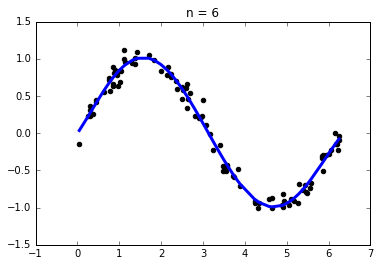

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     731.8
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           2.22e-78
Time:                        22:15:13   Log-Likelihood:                 99.453
No. Observations:                 100   AIC:                            -184.9
Df Residuals:                      93   BIC:                            -166.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8284      0.215      3.848      0.0

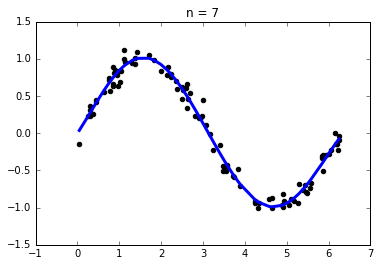

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     634.6
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           5.78e-77
Time:                        22:15:13   Log-Likelihood:                 99.539
No. Observations:                 100   AIC:                            -183.1
Df Residuals:                      92   BIC:                            -162.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9107      0.300      3.039      0.0

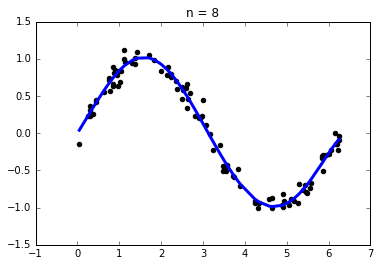

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     572.7
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           4.68e-76
Time:                        22:15:13   Log-Likelihood:                 100.83
No. Observations:                 100   AIC:                            -183.7
Df Residuals:                      91   BIC:                            -160.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4509      0.421      1.070      0.2

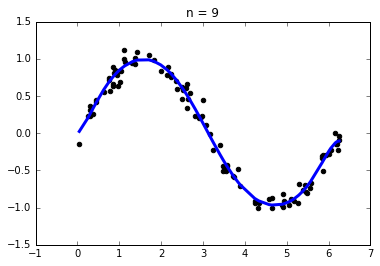

In [12]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01

    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))

    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

### Repeat the same exercise with the function

$$ y = e^x $$

You should again find that larger polynomials fit the data better.

### A bad model for the exponential

To see a model with high variance, try fitting the model:

```
y = a sin(x) + b cos(x)
```

to `y = e^x`. Does this model have more bias or variance?

> Answer: This model has high bias.